In [16]:
import psycopg2
import pandas as pd

# Establish a connection
connection = psycopg2.connect(
    host="",
    port=,  # Replace with the appropriate port number
    dbname="",
    user="",
    password=""
)

# Create a cursor
cursor = connection.cursor()

# Execute SQL query to fetch data from table
query = "SELECT * FROM ratings;"
cursor.execute(query)

# Fetch all results as a list of tuples
results = cursor.fetchall()

# Get column names from cursor.description
columns = [desc[0] for desc in cursor.description]

# Create a Pandas DataFrame from fetched results and column names
df = pd.DataFrame(results, columns=columns)

# Close cursor and connection
cursor.close()
connection.close()

# Display the DataFrame
print(df.head())


   user_id              movie_id  rating          time_stamp
0   657804   everyones+hero+2006       3 2023-04-12 21:28:32
1    76784  separate+tables+1958       4 2023-04-12 21:28:32
2   949008   wreck-it+ralph+2012       5 2023-04-12 21:28:32
3   847168     modern+times+1936       3 2023-04-12 21:28:32
4   471540    heat+and+dust+1983       4 2023-04-12 21:28:32


In [17]:
len(df)

4698188

In [28]:
# Calculate the standard deviation of ratings per user
user_std = df.groupby('user_id')['rating'].std()

# Identify suspicious users based on high standard deviation of ratings and minimum count of 10
suspicious_users = user_std[(user_std > user_std.mean() + 3.5 * user_std.std()) & (df['user_id'].value_counts() >= 10)].index

# Iterate through suspicious user IDs and print corresponding rows in the DataFrame
for user_id in suspicious_users:
    print(df[df["user_id"] == user_id])

        user_id                         movie_id  rating          time_stamp
578720   745124                 death+proof+2007       5 2023-04-14 15:13:59
579170   745124            kill+bill+vol.+1+2003       5 2023-04-14 15:24:15
580527   745124                     platoon+1986       1 2023-04-14 15:27:45
581428   745124                jackie+brown+1997       5 2023-04-14 15:10:31
581950   745124                   alexander+2004       1 2023-04-14 14:46:42
584032   745124  born+on+the+fourth+of+july+1989       1 2023-04-14 15:25:57
584468   745124            kill+bill+vol.+2+2004       5 2023-04-14 15:03:57
584727   745124                pulp+fiction+1994       5 2023-04-14 14:44:44
585843   745124                         jfk+1991       1 2023-04-14 15:07:47
586937   745124        natural+born+killers+1994       1 2023-04-14 14:57:53
588230   745124            django+unchained+2012       5 2023-04-14 15:02:55
590098   745124                       nixon+1995       1 2023-04-14 15:06:14

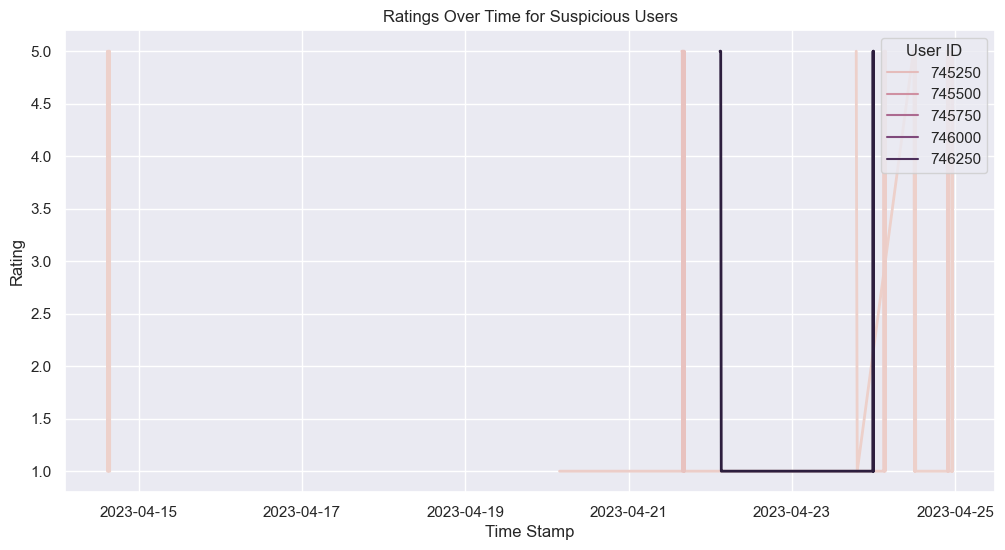

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the DataFrame to only include suspicious users
suspicious_df = df[df['user_id'].isin(suspicious_users)]

# Create a line plot of ratings over time for each suspicious user
sns.set(style='darkgrid')
plt.figure(figsize=(12, 6))
sns.lineplot(x='time_stamp', y='rating', hue='user_id', data=suspicious_df, linewidth=2)
plt.xlabel('Time Stamp')
plt.ylabel('Rating')
plt.title('Ratings Over Time for Suspicious Users')
plt.legend(title='User ID', loc='upper right')
plt.show()

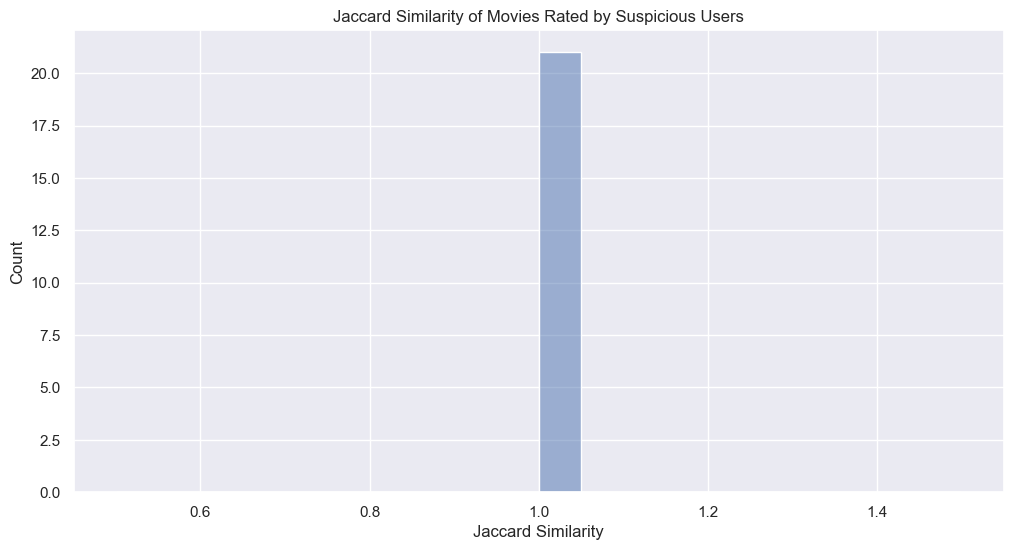

In [33]:
from itertools import combinations

# Filter the DataFrame to only include suspicious users
suspicious_df = df[df['user_id'].isin(suspicious_users)]

# Group the ratings by user and movie, and create a set of movies rated by each user
user_movie_sets = suspicious_df.groupby('user_id')['movie_id'].apply(set)

# Calculate Jaccard similarity between pairs of users
user_pairs = list(combinations(user_movie_sets.index, 2))
jaccard_similarity = []
for pair in user_pairs:
    intersection = len(user_movie_sets[pair[0]].intersection(user_movie_sets[pair[1]]))
    union = len(user_movie_sets[pair[0]].union(user_movie_sets[pair[1]]))
    similarity = intersection / union
    jaccard_similarity.append(similarity)

# Plot the Jaccard similarity as a histogram
sns.set(style='darkgrid')
plt.figure(figsize=(12, 6))
sns.histplot(jaccard_similarity, bins=20, kde=True)
plt.xlabel('Jaccard Similarity')
plt.ylabel('Count')
plt.title('Jaccard Similarity of Movies Rated by Suspicious Users')
plt.show()

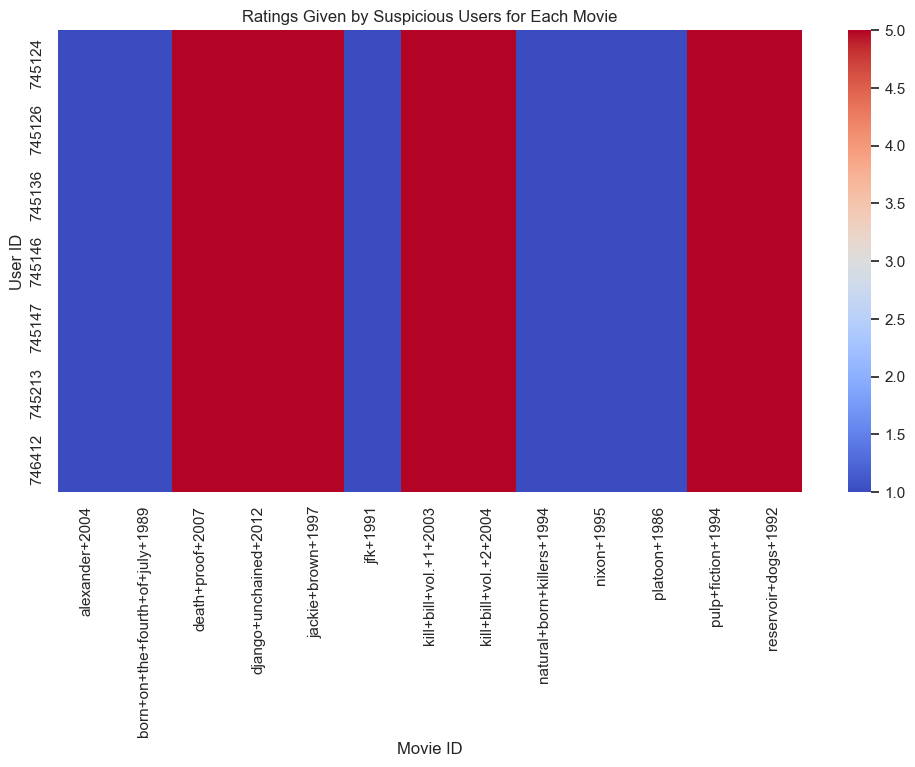

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the DataFrame to only include suspicious users
suspicious_df = df[df['user_id'].isin(suspicious_users)]

# Pivot the DataFrame to create a matrix of user IDs as rows and movie IDs as columns, with ratings as values
user_movie_matrix = suspicious_df.pivot(index='user_id', columns='movie_id', values='rating')

# Create a heatmap to visualize the ratings given by suspicious users for each movie
sns.set(style='darkgrid')
plt.figure(figsize=(12, 6))
sns.heatmap(user_movie_matrix, cmap='coolwarm', cbar=True)
plt.xlabel('Movie ID')
plt.ylabel('User ID')
plt.title('Ratings Given by Suspicious Users for Each Movie')
plt.show()

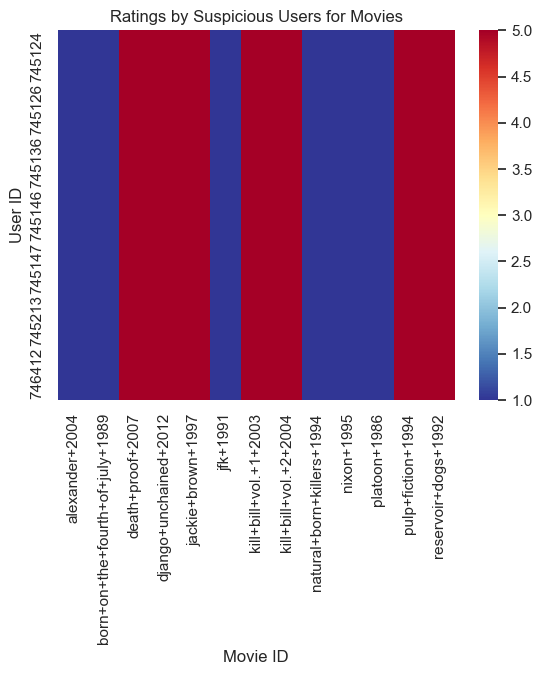

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the DataFrame to only include suspicious users
suspicious_df = df[df['user_id'].isin(suspicious_users)]

# Pivot the DataFrame to have user_id as rows, movie_id as columns, and rating as values
pivot_df = suspicious_df.pivot(index='user_id', columns='movie_id', values='rating')

# Create a heatmap using Seaborn
sns.heatmap(pivot_df, cmap='RdYlBu_r', cbar=True)

# Set the title and axis labels
plt.title('Ratings by Suspicious Users for Movies')
plt.xlabel('Movie ID')
plt.ylabel('User ID')

# Show the plot
plt.show()
